In [1]:
# conncect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/USC Coursework/Artificial Intelligence - CSCE 580/CSCE580-Fall2024-Nayeem-SharedInfo/statlog+german+credit+data/german.data'

In [8]:
import pandas as pd
column_names = [
    "Status", "Duration", "Credit_History", "Purpose", "Credit_Amount", "Savings",
    "Employment", "Installment_Rate", "Personal_Status", "Other_Debtors", "Residence_Since",
    "Property", "Age", "Other_Installment_Plans", "Housing", "Existing_Credits", "Job",
    "Num_Dependents", "Own_Telephone", "Foreign_Worker", "Credit_Risk"
]
data = pd.read_csv(path, sep=' ', names=column_names)

print(data)

    Status  Duration Credit_History Purpose  Credit_Amount Savings Employment  \
0      A11         6            A34     A43           1169     A65        A75   
1      A12        48            A32     A43           5951     A61        A73   
2      A14        12            A34     A46           2096     A61        A74   
3      A11        42            A32     A42           7882     A61        A74   
4      A11        24            A33     A40           4870     A61        A73   
..     ...       ...            ...     ...            ...     ...        ...   
995    A14        12            A32     A42           1736     A61        A74   
996    A11        30            A32     A41           3857     A61        A73   
997    A14        12            A32     A43            804     A61        A75   
998    A11        45            A32     A43           1845     A61        A73   
999    A12        45            A34     A41           4576     A62        A71   

     Installment_Rate Perso

In [15]:
data.to_csv('/content/drive/MyDrive/USC Coursework/Artificial Intelligence - CSCE 580/CSCE580-Fall2024-Nayeem-SharedInfo/statlog+german+credit+data/german_mod.csv', index=False)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
X = data.iloc[:, :-1]
y = data.iloc[:, -1]  # Credit_Risk

# Categorical separation
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Map the target labels (1 -> 0, 2 -> 1)
y = y.map({1: 0, 2: 1})


# Data Split [70% for Train and 30% for Test]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
class_weights = {0: 1, 1: 5}
rf_clf = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_clf.fit(X_train, y_train)


# Predictions
y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

report = classification_report(y_test, y_pred, target_names=['Good (0)', 'Bad (1)'])
print(f"Classification Report:\n{report}")

Accuracy: 0.7467
Classification Report:
              precision    recall  f1-score   support

    Good (0)       0.76      0.92      0.84       209
     Bad (1)       0.66      0.34      0.45        91

    accuracy                           0.75       300
   macro avg       0.71      0.63      0.64       300
weighted avg       0.73      0.75      0.72       300



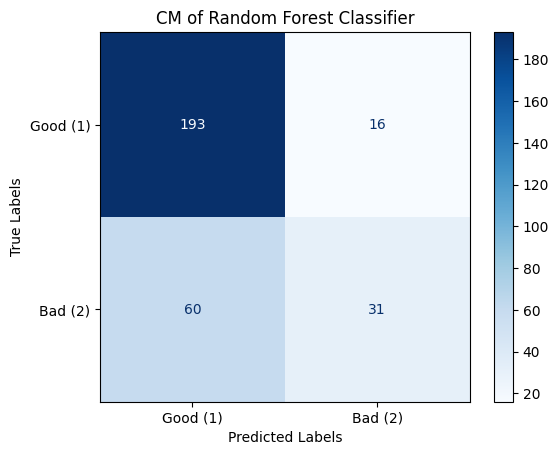

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good (1)', 'Bad (2)'])
disp.plot(cmap='Blues')
disp.ax_.set_title("CM of Random Forest Classifier")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Encode categorical variables
df_encoded = data.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Define features and target
X = df_encoded.drop(columns=['Credit_Risk'])
y = df_encoded['Credit_Risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = svm_classifier.predict(X_test)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)




Accuracy: 0.7466666666666667
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.91      0.83       209
           2       0.65      0.36      0.46        91

    accuracy                           0.75       300
   macro avg       0.71      0.64      0.65       300
weighted avg       0.73      0.75      0.72       300



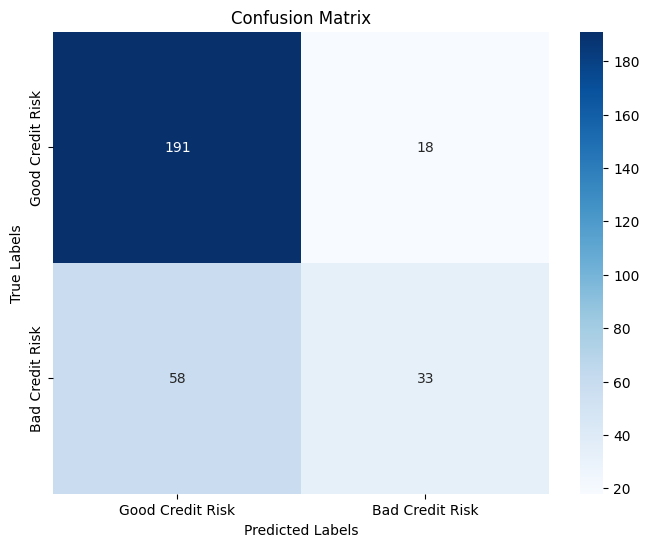

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Good Credit Risk', 'Bad Credit Risk'],
            yticklabels=['Good Credit Risk', 'Bad Credit Risk'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [25]:
!pip install lime --quiet

In [26]:
# Import necessary libraries
from lime.lime_tabular import LimeTabularExplainer

# Convert X_train and X_test back to DataFrames with column names for LIME
X_train_df = pd.DataFrame(X_train, columns=column_names[:-1])
X_test_df = pd.DataFrame(X_test, columns=column_names[:-1])

# Create LIME Explainer for both classifiers
explainer_rf = LimeTabularExplainer(X_train_df.values, mode='classification', training_labels=y_train, feature_names=column_names[:-1])
explainer_svm = LimeTabularExplainer(X_train_df.values, mode='classification', training_labels=y_train, feature_names=column_names[:-1])

# Choose an instance to explain (for example, a row from the test set)
instance_idx = 0  # You can change this to any index you want to explain
instance_to_explain = X_test_df.iloc[instance_idx]

